<a href="https://colab.research.google.com/github/Aaryan-Bansal/Early-Detection-of-Parkinson-s-Disease/blob/main/new__pd_paper_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('parkinsons.data')

###Data Information and Handle Missing Values (if any)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data=data.drop(columns=['name'])

In [ ]:
# Check for missing values
print(data.isnull().sum())

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [ ]:
# Count the occurrences of each unique value in the 'status' column
status_counts = data['status'].value_counts()
print(status_counts)


status
1    147
0     48
Name: count, dtype: int64


###Handling Outliers

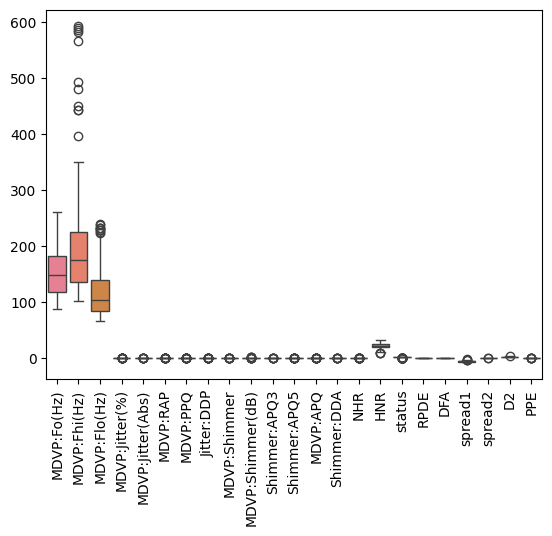

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [ ]:
#IQR Method
# Calculate IQR
def drop_outliers_iqr(df):
    df_1 = df.select_dtypes(include=['number'])
    Q1 = df_1.quantile(0.25)
    Q3 = df_1.quantile(0.75)
    IQR = Q3 - Q1
    # Define a condition to identify outliers (1.5 times the IQR)
    is_not_outlier = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return df[is_not_outlier.all(axis=1)]

# Drop outliers from your dataset (excluding the 'status' column)
data_without_outliers = drop_outliers_iqr(data.drop(columns=['status']))

# Re-attach the 'status' column after removing outliers
data_cleaned_iqr = pd.concat([data_without_outliers, data['status']], axis=1).dropna()




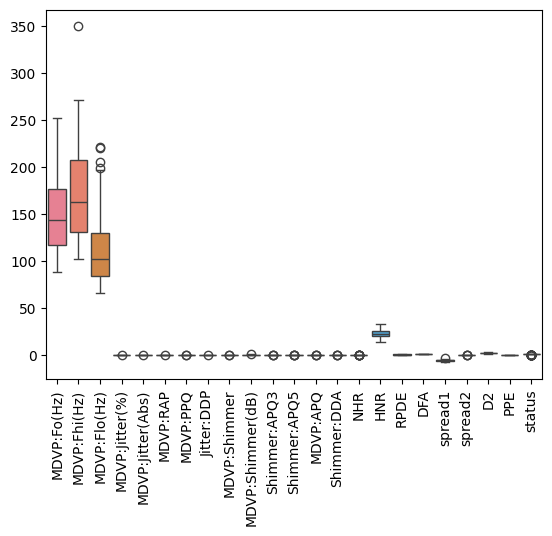

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data_cleaned_iqr)
plt.xticks(rotation=90)
plt.show()


In [ ]:
data_cleaned_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       148 non-null    float64
 1   MDVP:Fhi(Hz)      148 non-null    float64
 2   MDVP:Flo(Hz)      148 non-null    float64
 3   MDVP:Jitter(%)    148 non-null    float64
 4   MDVP:Jitter(Abs)  148 non-null    float64
 5   MDVP:RAP          148 non-null    float64
 6   MDVP:PPQ          148 non-null    float64
 7   Jitter:DDP        148 non-null    float64
 8   MDVP:Shimmer      148 non-null    float64
 9   MDVP:Shimmer(dB)  148 non-null    float64
 10  Shimmer:APQ3      148 non-null    float64
 11  Shimmer:APQ5      148 non-null    float64
 12  MDVP:APQ          148 non-null    float64
 13  Shimmer:DDA       148 non-null    float64
 14  NHR               148 non-null    float64
 15  HNR               148 non-null    float64
 16  RPDE              148 non-null    float64
 17  DF

In [ ]:
# Count the occurrences of each unique value in the 'status' column
status_counts = data_cleaned_iqr['status'].value_counts()
print(status_counts)


status
1    114
0     34
Name: count, dtype: int64


###Feature Extraction or Selection

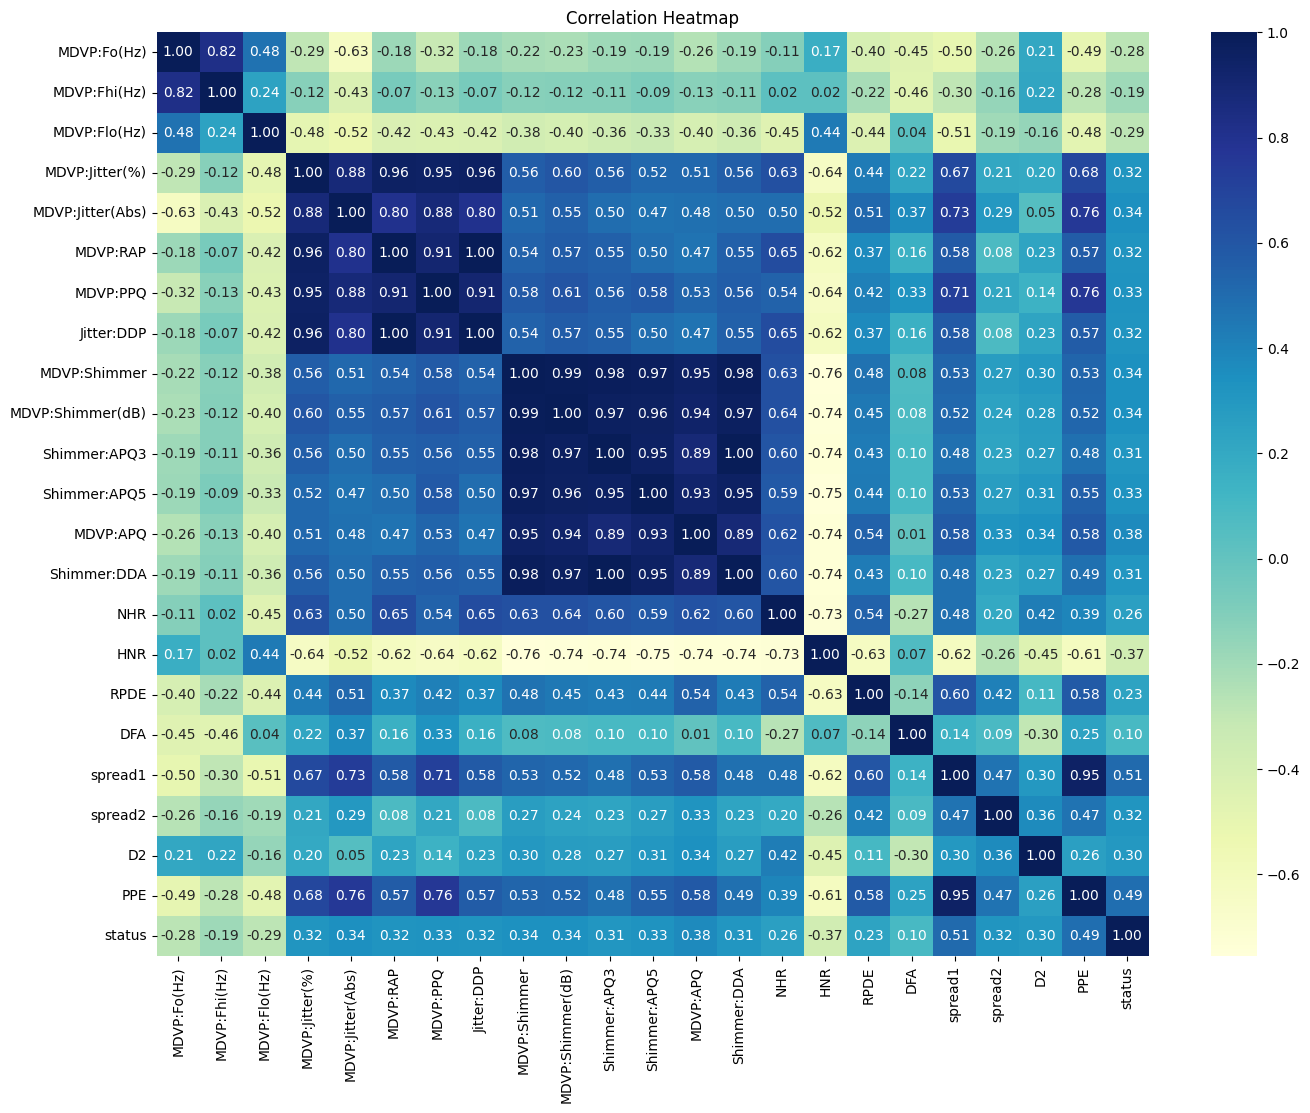

In [ ]:
correlation_matrix=data_cleaned_iqr.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
paper_top_features=['HNR', 'RPDE', 'DFA', 'PPE',]

###Data Balancing (Over-Sampling or Under-Sampling)

In [ ]:
#over_sampling  using paper_top_features
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assume your target variable is named 'target' and features are all other columns
X = data_cleaned_iqr.drop('status', axis=1)
X=X[paper_top_features]  # Features
y = data_cleaned_iqr['status']                # Target variable

# Display original class distribution
print("Original class distribution:", Counter(y))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_over_sampled_1, y_over_sampled_1 = smote.fit_resample(X, y)

# Display the new class distribution
print("Resampled class distribution:", Counter(y_over_sampled_1))

# Now you can proceed with your model training using X_resampled and y_resampled


Original class distribution: Counter({1: 114, 0: 34})
Resampled class distribution: Counter({1: 114, 0: 114})


In [ ]:
df_over_sampeled_1=pd.concat([X_over_sampled_1, y_over_sampled_1 ], axis=1)

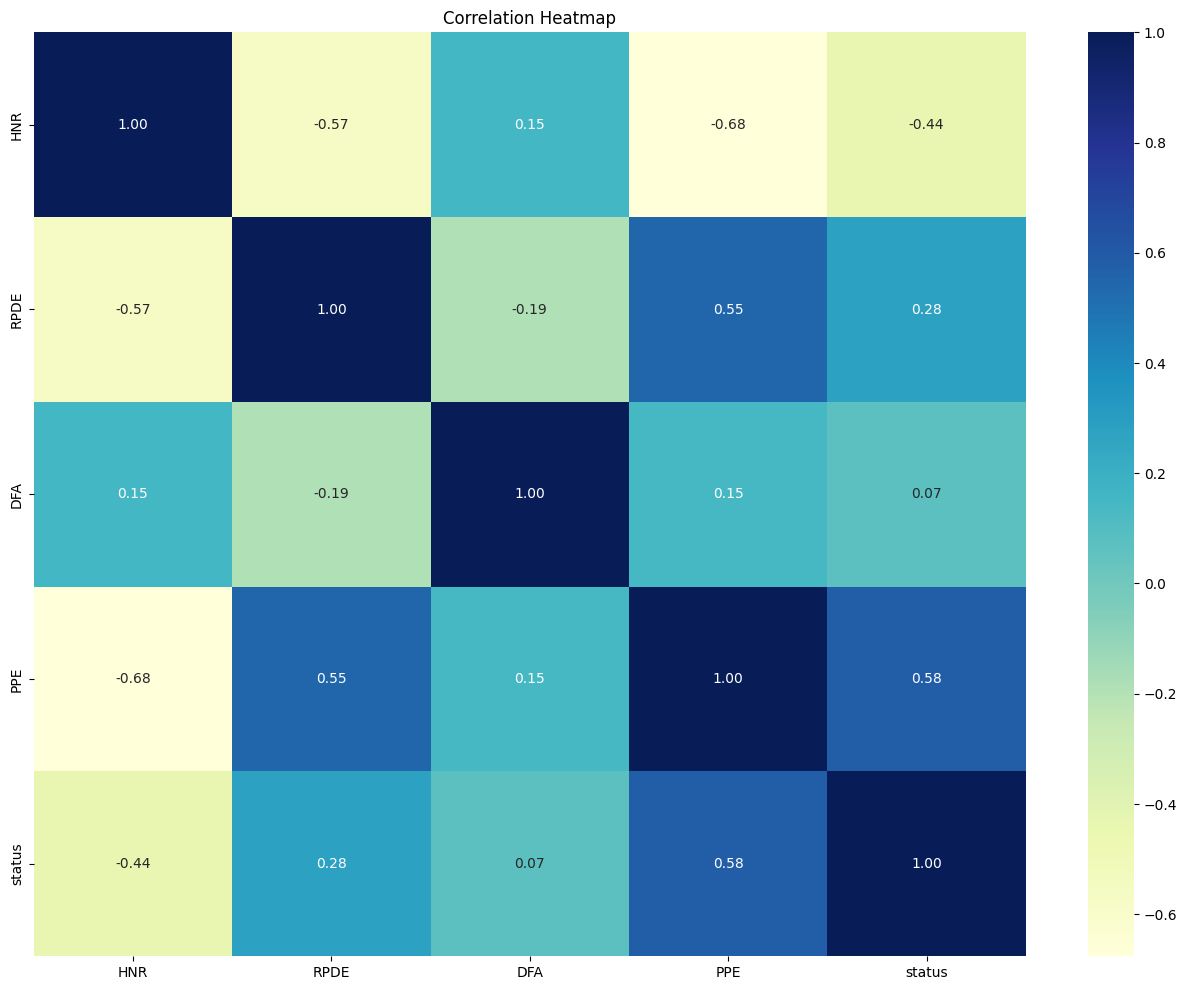

In [ ]:
correlation_matrix=df_over_sampeled_1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

###Train-Test Split & Data Standardization

In [ ]:
# prompt: scaler = MinMaxScaler(feature_range=(-1, 1))
# features_scaled = scaler.fit_transform(features)
# write this code

from sklearn.preprocessing import MinMaxScaler

# Assuming X_over_sampled_1 contains your features after oversampling
features = X_over_sampled_1

scaler = MinMaxScaler(feature_range=(-1, 1))
features_scaled = scaler.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df_over_sampeled_1.drop(columns=['status'],axis=1)
y=df_over_sampeled_1['status']
X_train_over_sampeled_1, X_test_over_sampeled_1, y_train__over_sampeled_1, y_test_over_sampeled_1 = train_test_split(X, y, test_size=0.2, random_state=42)

#Using standardization for feature scaling
scaler=StandardScaler()

X_train_over_sampeled_1= scaler.fit_transform(X_train_over_sampeled_1)
X_test_over_sampeled_1 = scaler.transform(X_test_over_sampeled_1)

###Model Creation

In [ ]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score



# Define the parameter grid for SVM hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.1, 1, 10]  # Kernel coefficient for RBF
}

# Initialize the SVM model
svm = SVC(kernel='rbf', random_state=42)

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over_sampeled_1, y_train__over_sampeled_1)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Define a function for bootstrapping evaluation
def bootstrap_evaluation(model, X, y, n_bootstraps=50):
    scores = []
    for _ in range(n_bootstraps):
        # Sample with replacement
        X_resampled, y_resampled = resample(X, y, random_state=42)
        model.fit(X_resampled, y_resampled)
        # Test on the original test set
        y_pred = model.predict(X_test_over_sampeled_1)
        scores.append(accuracy_score(y_test_over_sampeled_1, y_pred))
    return np.mean(scores), np.std(scores)

# Initialize and fit SVM with best found parameters
svm_optimized = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
mean_accuracy, std_accuracy = bootstrap_evaluation(svm_optimized, X_train_over_sampeled_1, y_train__over_sampeled_1)

best_params, mean_accuracy * 100  # Convert accuracy to percentage for easier interpretation


({'C': 100, 'gamma': 0.1}, 89.13043478260869)

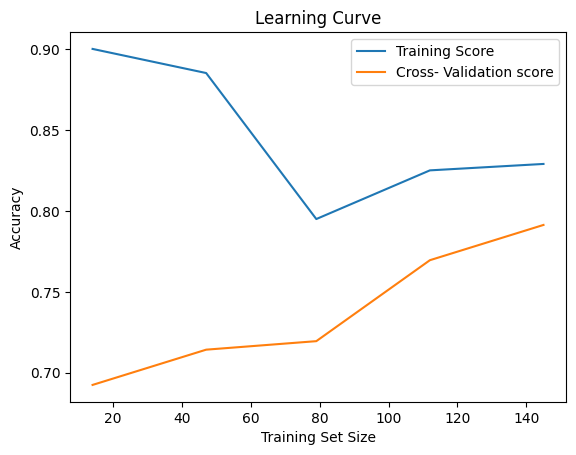

In [ ]:
# In an overfitted model, the gap between the training and validation curves will be large.
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(svm, X_train_over_sampeled_1, y_train__over_sampeled_1, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean,label='Training Score')
plt.plot(train_sizes,test_mean,label='Cross- Validation score')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
# prompt: print the test and train accuracy

# ... (Your existing code)

# Initialize and fit SVM with best found parameters
svm_optimized = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
svm_optimized.fit(X_train_over_sampeled_1, y_train__over_sampeled_1)

# Predict on the test set
y_pred_test = svm_optimized.predict(X_test_over_sampeled_1)
y_pred_train = svm_optimized.predict(X_train_over_sampeled_1)


# Calculate accuracy scores
test_accuracy = accuracy_score(y_test_over_sampeled_1, y_pred_test)
train_accuracy = accuracy_score(y_train__over_sampeled_1, y_pred_train)

print(f"Test Accuracy: {test_accuracy}")
print(f"Train Accuracy: {train_accuracy}")

Test Accuracy: 0.9130434782608695
Train Accuracy: 0.9120879120879121


In [ ]:
# prompt: print mettrices

# ... (Your existing code)

# Initialize and fit SVM with best found parameters
svm_optimized = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
svm_optimized.fit(X_train_over_sampeled_1, y_train__over_sampeled_1)

# Predict on the test set
y_pred_test = svm_optimized.predict(X_test_over_sampeled_1)
y_pred_train = svm_optimized.predict(X_train_over_sampeled_1)


# Calculate accuracy scores
from sklearn.metrics import classification_report, confusion_matrix

test_accuracy = accuracy_score(y_test_over_sampeled_1, y_pred_test)
train_accuracy = accuracy_score(y_train__over_sampeled_1, y_pred_train)

print(f"Test Accuracy: {test_accuracy}")
print(f"Train Accuracy: {train_accuracy}")

# Print other metrics
print(classification_report(y_test_over_sampeled_1, y_pred_test))
print(confusion_matrix(y_test_over_sampeled_1, y_pred_test))

Test Accuracy: 0.9130434782608695
Train Accuracy: 0.9120879120879121
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.91      0.91      0.91        22

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.91      0.91      0.91        46

[[22  2]
 [ 2 20]]


Random Forest - Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Mean Accuracy: 0.9130434782608694
Random Forest - Standard Deviation of Accuracy: 1.1102230246251565e-16


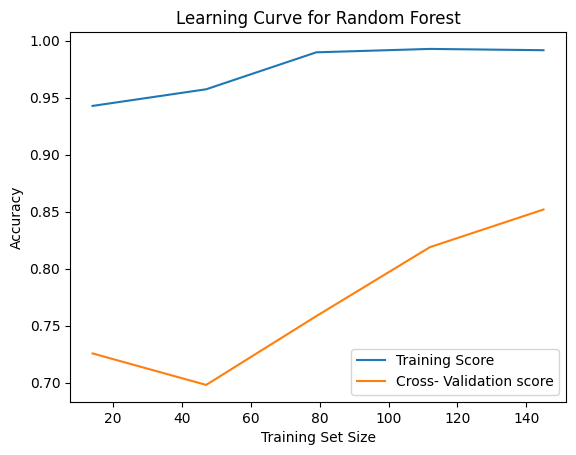

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.95      0.86      0.90        22

    accuracy                           0.91        46
   macro avg       0.92      0.91      0.91        46
weighted avg       0.92      0.91      0.91        46

[[23  1]
 [ 3 19]]
Precision: 0.95
Recall: 0.8636363636363636
F1-score: 0.9047619047619048


In [ ]:
# prompt: use random forest hyper paprameter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required to be at a leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_over_sampeled_1, y_train__over_sampeled_1)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_


# Evaluate the best model
mean_accuracy_rf, std_accuracy_rf = bootstrap_evaluation(best_rf_model, X_train_over_sampeled_1, y_train__over_sampeled_1)
print(f"Random Forest - Best Hyperparameters: {best_params_rf}")
print(f"Random Forest - Mean Accuracy: {mean_accuracy_rf}")
print(f"Random Forest - Standard Deviation of Accuracy: {std_accuracy_rf}")


#Learning Curve for RandomForest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(best_rf_model, X_train_over_sampeled_1, y_train__over_sampeled_1, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_mean_rf=np.mean(train_scores_rf,axis=1)
test_mean_rf=np.mean(test_scores_rf,axis=1)

plt.plot(train_sizes_rf,train_mean_rf,label='Training Score')
plt.plot(train_sizes_rf,test_mean_rf,label='Cross- Validation score')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest")
plt.legend()
plt.show()

#Predict on the test set
y_pred_test_rf = best_rf_model.predict(X_test_over_sampeled_1)
y_pred_train_rf = best_rf_model.predict(X_train_over_sampeled_1)


#Calculate additional metrics
print(classification_report(y_test_over_sampeled_1, y_pred_test_rf))
print(confusion_matrix(y_test_over_sampeled_1, y_pred_test_rf))

precision_rf = precision_score(y_test_over_sampeled_1, y_pred_test_rf)
recall_rf = recall_score(y_test_over_sampeled_1, y_pred_test_rf)
f1_rf = f1_score(y_test_over_sampeled_1, y_pred_test_rf)


print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

In [ ]:
# prompt: print test and train accuracy for random forest you did above with hyper params

# Predict on the test and training sets
y_pred_test_rf = best_rf_model.predict(X_test_over_sampeled_1)
y_pred_train_rf = best_rf_model.predict(X_train_over_sampeled_1)

# Calculate accuracy scores
test_accuracy_rf = accuracy_score(y_test_over_sampeled_1, y_pred_test_rf)
train_accuracy_rf = accuracy_score(y_train__over_sampeled_1, y_pred_train_rf)

print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print(f"Random Forest Train Accuracy: {train_accuracy_rf}")

Random Forest Test Accuracy: 0.9130434782608695
Random Forest Train Accuracy: 0.945054945054945


In [ ]:
# prompt: do stacking algo with hyper params if possible and print test and train accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define estimators for stacking
estimators = [
    ('rf', best_rf_model),  # Use the best RandomForest model
    ('svm', svm_optimized)   # Use the best SVM model
]

# Initialize the stacking classifier with a final estimator (e.g., Logistic Regression)
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train_over_sampeled_1, y_train__over_sampeled_1)

# Predict on test and train sets
y_pred_test_stacking = stacking_model.predict(X_test_over_sampeled_1)
y_pred_train_stacking = stacking_model.predict(X_train_over_sampeled_1)

# Evaluate the stacking model
test_accuracy_stacking = accuracy_score(y_test_over_sampeled_1, y_pred_test_stacking)
train_accuracy_stacking = accuracy_score(y_train__over_sampeled_1, y_pred_train_stacking)


print(f"Stacking Test Accuracy: {test_accuracy_stacking}")
print(f"Stacking Train Accuracy: {train_accuracy_stacking}")

Stacking Test Accuracy: 0.9130434782608695
Stacking Train Accuracy: 0.9285714285714286


In [ ]:
# prompt: print metrices

from sklearn.metrics import precision_score, recall_score, f1_score

# ... (Your existing code)

# Predict on the test set
y_pred_test = svm_optimized.predict(X_test_over_sampeled_1)

# Calculate additional metrics
print(classification_report(y_test_over_sampeled_1, y_pred_test))
print(confusion_matrix(y_test_over_sampeled_1, y_pred_test))

precision = precision_score(y_test_over_sampeled_1, y_pred_test)
recall = recall_score(y_test_over_sampeled_1, y_pred_test)
f1 = f1_score(y_test_over_sampeled_1, y_pred_test)


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.91      0.91      0.91        22

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.91      0.91      0.91        46

[[22  2]
 [ 2 20]]
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1-score: 0.9090909090909091


In [ ]:
# prompt: apply ann

# Import necessary libraries (if not already imported)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming X_train_over_sampeled_1, y_train__over_sampeled_1,
# X_test_over_sampeled_1, and y_test_over_sampeled_1 are defined

# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_over_sampeled_1.shape[1],)),  # Input layer
    layers.Dropout(0.2),  # Add dropout for regularization
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid') # Output layer (sigmoid for binary classification)
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_over_sampeled_1, y_train__over_sampeled_1, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_over_sampeled_1, y_test_over_sampeled_1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test_over_sampeled_1)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels

#Further evaluation (e.g., classification report, confusion matrix)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_over_sampeled_1, y_pred))
print(confusion_matrix(y_test_over_sampeled_1, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5211 - loss: 0.7142 - val_accuracy: 0.5405 - val_loss: 0.7006
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5432 - loss: 0.6950 - val_accuracy: 0.5405 - val_loss: 0.6701
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5409 - loss: 0.6586 - val_accuracy: 0.5946 - val_loss: 0.6431
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6569 - loss: 0.6226 - val_accuracy: 0.6216 - val_loss: 0.6187
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6220 - loss: 0.6197 - val_accuracy: 0.6757 - val_loss: 0.5972
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6821 - loss: 0.5862 - val_accuracy: 0.6757 - val_loss: 0.5764
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7258 - loss: 0.5766 - val_accuracy: 0.7027 - val_loss: 0.5577
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7362 - loss: 0.5634 - val_accuracy: 0.7027 - val_loss: 0.5405
